In [132]:
import tensorflow as tf
from tensorflow import keras
import os
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model

In [133]:
CATEGORIES = ['Dog', 'Cat']

In [134]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in1 = open("y.pickle","rb")
y = pickle.load(pickle_in1)

In [135]:
X = X / 255.0
IMG_SIZE = 75

In [136]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = .2)

In [137]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(X.shape[1:])),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [138]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [139]:
model.fit(X_train, y_train, epochs = 5, batch_size = 32)

Train on 39913 samples
Epoch 1/5
39913/39913 [==============================] - 4s 95us/sample - loss: 0.6817 - accuracy: 0.5669
Epoch 2/5
39913/39913 [==============================] - 3s 84us/sample - loss: 0.6643 - accuracy: 0.6003
Epoch 3/5
39913/39913 [==============================] - 3s 82us/sample - loss: 0.6591 - accuracy: 0.6057
Epoch 4/5
39913/39913 [==============================] - 3s 83us/sample - loss: 0.6565 - accuracy: 0.6095
Epoch 5/5
39913/39913 [==============================] - 3s 83us/sample - loss: 0.6555 - accuracy: 0.6111


In [140]:
prediction = model.predict(X_test)

In [151]:
print(np.argmax(prediction))

4029


In [145]:
numbers = []

In [146]:
for number in range(10):
    numbers.append(random.randrange(1, 1000))

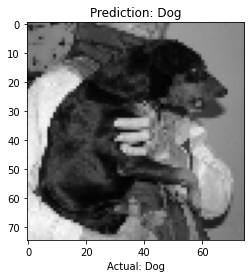

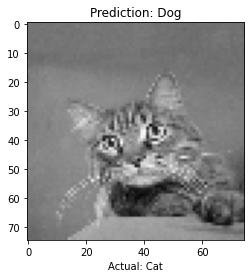

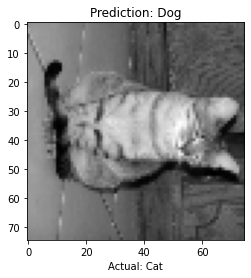

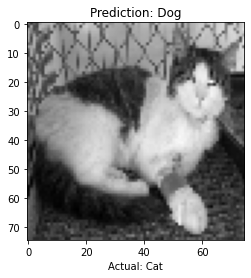

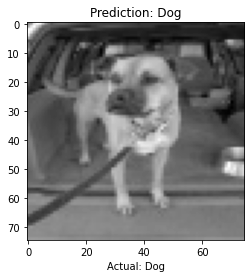

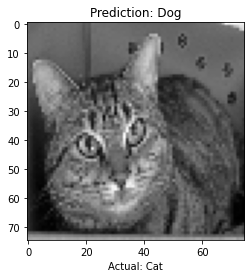

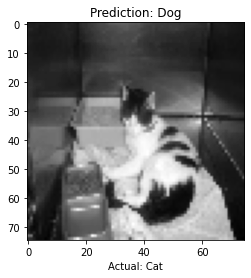

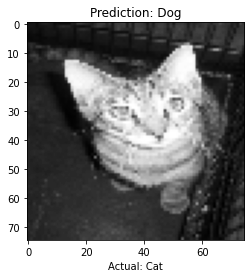

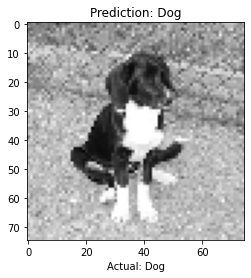

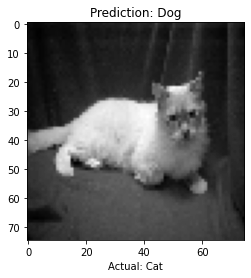

In [147]:
for i in numbers:
    plt.grid(False)
    plt.imshow(X_test[i], cmap='gray')
    plt.xlabel('Actual: ' + CATEGORIES[y_test[i]])
    plt.title('Prediction: ' + CATEGORIES[np.argmax(prediction[i])])
    plt.show()